<a href="https://colab.research.google.com/github/hyunj941031/ds-sa-cp2/blob/main/mobile_click.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/fashion_campus_dataset/mobile_click.csv')

In [2]:
data.tail()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
11548299,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07T04:37:53.354381Z,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,NaN,NaN,NaN,NaN,Bekas,NaN,NaN
11548300,64585e37-3fe7-48d7-b79b-ebcb70230eb2,HOMEPAGE,2021-05-05T11:44:14.985835Z,ab0acc87-9578-408a-b47f-c46996b8b52f,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11548301,64585e37-3fe7-48d7-b79b-ebcb70230eb2,ADD_TO_CART,2021-05-05T11:53:10.985835Z,230d7b67-9934-42f9-9509-b330ac6ae777,MOBILE,19820.0,1.0,88918.0,NaN,NaN,NaN,NaN
11548302,64585e37-3fe7-48d7-b79b-ebcb70230eb2,BOOKING,2021-05-05T12:10:09.135142Z,8996ce49-c5dd-41ed-9231-28bfdb634cbe,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
11548303,64585e37-3fe7-48d7-b79b-ebcb70230eb2,SEARCH,2021-05-05T11:53:12.985835Z,3c60d8bc-b3e1-41fa-a87b-f65a9053856a,MOBILE,NaN,NaN,NaN,NaN,Baju,NaN,NaN


In [3]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

mobile_click = data.copy()
mobile_click['session_id'] = label_encoder.fit_transform(mobile_click['session_id'])

mobile_click = mobile_click.drop(['event_id', 'traffic_source'], axis=1)

mobile_click['event_time'] = pd.to_datetime(mobile_click['event_time'])
mobile_click['year'] = mobile_click['event_time'].dt.year

mobile_click

,session_id,event_name,event_time,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,789905,HOMEPAGE,2019-09-06T15:54:32.821085Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,789905,SCROLL,2019-09-06T16:03:57.821085Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,393383,HOMEPAGE,2019-09-01T12:05:10.322763Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,393383,ADD_TO_CART,2019-09-01T12:06:33.322763Z,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,393383,BOOKING,2019-09-01T12:15:29.425431Z,NaN,NaN,NaN,Success,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11548299,543927,SEARCH,2021-06-07T04:37:53.354381Z,NaN,NaN,NaN,NaN,Bekas,NaN,NaN
11548300,314881,HOMEPAGE,2021-05-05T11:44:14.985835Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11548301,314881,ADD_TO_CART,2021-05-05T11:53:10.985835Z,19820.0,1.0,88918.0,NaN,NaN,NaN,NaN
11548302,314881,BOOKING,2021-05-05T12:10:09.135142Z,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [4]:
event_label_encoder = preprocessing.LabelEncoder()
mobile_click['event_name'] = event_label_encoder.fit_transform(mobile_click['event_name'])

mobile_click

,session_id,event_name,event_time,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,789905,4,2019-09-06T15:54:32.821085Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,789905,7,2019-09-06T16:03:57.821085Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,393383,4,2019-09-01T12:05:10.322763Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,393383,1,2019-09-01T12:06:33.322763Z,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,393383,2,2019-09-01T12:15:29.425431Z,NaN,NaN,NaN,Success,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11548299,543927,8,2021-06-07T04:37:53.354381Z,NaN,NaN,NaN,NaN,Bekas,NaN,NaN
11548300,314881,4,2021-05-05T11:44:14.985835Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11548301,314881,1,2021-05-05T11:53:10.985835Z,19820.0,1.0,88918.0,NaN,NaN,NaN,NaN
11548302,314881,2,2021-05-05T12:10:09.135142Z,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [5]:
event_label_encoder.classes_

array(['ADD_PROMO', 'ADD_TO_CART', 'BOOKING', 'CLICK', 'HOMEPAGE',
       'ITEM_DETAIL', 'PROMO_PAGE', 'SCROLL', 'SEARCH'], dtype=object)

In [8]:
event_df = mobile_click.iloc[:, [0, 1, 3, 5]]
event_df

,session_id,event_name,product_id,item_price
0,789905,4,NaN,NaN
1,789905,7,NaN,NaN
2,393383,4,NaN,NaN
3,393383,1,15315.0,313529.0
4,393383,2,NaN,NaN
...,...,...,...,...
11548299,543927,8,NaN,NaN
11548300,314881,4,NaN,NaN
11548301,314881,1,19820.0,88918.0
11548302,314881,2,NaN,NaN


In [10]:
seq_list = []
for sess in event_df['session_id'].unique():
    temp_df = event_df[event_df.session_id == sess]
    event_seq = []
    item_seq = []
    for i in range(len(temp_df)):
        event_seq.append(temp_df.iloc[i, 1])
        item = temp_df.iloc[i, 2]
        if not pd.isnull(item):
            item_seq.append(int(item))
    
    price = int(temp_df['item_price'].sum())
    if 2 in event_seq:
        target = 1
    else:
        target = 0

    seq_list.append([sess, event_seq, item_seq, price, target])

In [11]:
pattern_target = pd.DataFrame(seq_list, columns=['session_id', 'event_sequence', 'item_sequence', 'price', 'target']).set_index('session_id')
pattern_target

,event_sequence,item_sequence,price,target
session_id,,,,
789905,"[4, 7]",[],0,0
393383,"[4, 1, 2, 8, 4, 5, 7, 5, 5]",[15315],313529,1
779421,"[4, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 8, 7, 4, 7, ...","[6133, 6721, 57622, 5490, 21304, 12106, 59647,...",1810437,1
561060,"[4, 1, 2, 7]",[22681],496501,1
480448,"[4, 1, 0, 2, 7, 4, 8, 3, 8, 3, 3, 6, 3, 6]",[41867],261447,1
...,...,...,...,...
208187,"[4, 1, 2, 8]",[37198],291683,1
563189,"[4, 1, 2, 8]",[51847],290839,1
773424,"[4, 1, 2, 8]",[19386],208644,1


In [12]:
pattern_target.to_csv('/content/drive/MyDrive/fashion_campus_dataset/mobile_pattern_target.csv')

# Booking

In [ ]:
sess = set(mobile_click['session_id'].unique())
len(sess)

805552

In [ ]:
mobile_click['event_name'].value_counts()

CLICK          2247457
HOMEPAGE       2237231
ADD_TO_CART    1743476
SCROLL         1497180
ITEM_DETAIL    1161552
SEARCH         1056064
BOOKING         767254
PROMO_PAGE      544252
ADD_PROMO       293838
Name: event_name, dtype: int64

In [ ]:
85328/89651

0.9517796789773678

In [ ]:
book = mobile_click[mobile_click.event_name == 'BOOKING']['session_id'].unique()
book_sess = set(book)
len(book_sess)

767254

In [ ]:
len(sess - book_sess)

38298

In [ ]:
book_succ = mobile_click[(mobile_click.event_name == 'BOOKING') & (mobile_click.payment_status == 'Success')]['session_id'].unique()
book_fail = mobile_click[(mobile_click.event_name == 'BOOKING') & (mobile_click.payment_status == 'Failed')]['session_id'].unique()
len(book_succ), len(book_fail)

(734233, 33021)

In [ ]:
no_book = list(sess - book_sess)
len(no_book)

38298

In [ ]:
target_df = []
for sess in book_succ:
    target_df.append((sess, 'Booking Success'))

for sess in book_fail:
    target_df.append((sess, 'Booking Fail'))

for sess in no_book:
    target_df.append((sess, 'No Booking'))

target_df = pd.DataFrame(target_df, columns=['session_id', 'target'])
target_df

,session_id,target
0,393383,Booking Success
1,779421,Booking Success
2,561060,Booking Success
3,480448,Booking Success
4,707181,Booking Success
...,...,...
805547,786419,No Booking
805548,131061,No Booking
805549,786424,No Booking
805550,131066,No Booking


In [ ]:
target = target_df[['target']].value_counts(normalize=True) * 100
target = pd.DataFrame(target).reset_index().rename(columns={0:'percentage'})
target['percentage'] = target['percentage'].round(1)
target

,target,percentage
0,Booking Success,91.1
1,No Booking,4.8
2,Booking Fail,4.1


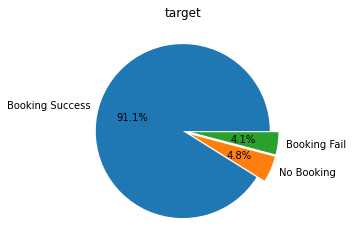

In [ ]:
explode = [0, 0.1, 0.1]

plt.pie(x = target['percentage'], labels = target['target'], autopct = '%.1f%%', explode=explode)
plt.title('target')
plt.show()

# Promotion

In [ ]:
promo_page = mobile_click[mobile_click.event_name == 'PROMO_PAGE']['session_id'].unique()
add_promo = mobile_click[mobile_click.event_name == 'ADD_PROMO']['session_id'].unique()
len(promo_page), len(add_promo)

(316003, 293838)

In [ ]:
len(set(promo_page) & set(add_promo))

155585

#### page to add

In [ ]:
page_add = len(set(promo_page) & set(add_promo))
page_add_no = len(set(promo_page) - set(add_promo))

In [ ]:
len(set(promo_page) - set(add_promo))

160418

In [ ]:
page_add, page_add_no

(155585, 160418)

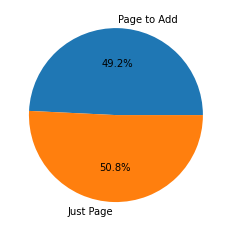

In [ ]:
labels = ['Page to Add', 'Just Page']
explode = [0, 0]
plt.pie([page_add, page_add_no], autopct='%.1f%%', labels=labels, explode=explode)
plt.show()

#### page to pay

In [ ]:
promo_page

array([779421, 480448,  66904, ..., 333611, 396907,  39354])

In [ ]:
prop_booking_succ = 0
prop_booking_fail = 0
prop_booking_no = 0

for sess in promo_page:
    temp = mobile_click[mobile_click.session_id==sess]
    if "BOOKING" in list(temp.event_name):
        if temp[temp.event_name == 'BOOKING']['payment_status'].iloc[0] == 'Success':
            prop_booking_succ += 1
        else:
            prop_booking_fail += 1
    else:
        prop_booking_no += 1   

In [ ]:
prop_booking_succ, prop_booking_fail, prop_booking_no

(288293, 12777, 14933)

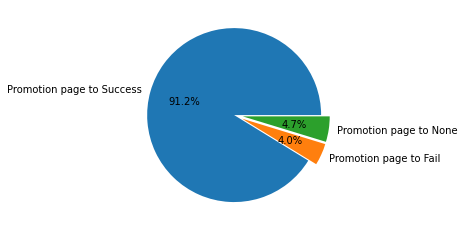

In [ ]:
labels = ['Promotion page to Success', 'Promotion page to Fail', 'Promotion page to None']
explode = [0, 0.1, 0.1]
plt.pie([prop_booking_succ, prop_booking_fail, prop_booking_no], autopct='%.1f%%', labels=labels, explode=explode)
plt.show()

#### add to pay

In [ ]:
add_booking_succ = 0
add_booking_fail = 0
add_booking_no = 0

for sess in add_promo:
    temp = mobile_click[mobile_click.session_id==sess]
    if "BOOKING" in list(temp.event_name):
        if temp[temp.event_name == 'BOOKING']['payment_status'].iloc[0] == 'Success':
            add_booking_succ += 1
        else:
            add_booking_fail += 1
    else:
        add_booking_no += 1

In [ ]:
add_booking_succ, add_booking_fail, add_booking_no

(281226, 12612, 0)

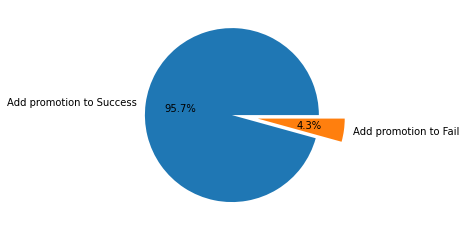

In [ ]:
labels = ['Add promotion to Success', 'Add promotion to Fail']
explode = [0, 0.3]
plt.pie([add_booking_succ, add_booking_fail], autopct='%.1f%%', labels=labels, explode=explode)
plt.show()

#### promotion preference

In [ ]:
mobile_click[['promo_code', 'year']].dropna(axis=0).reset_index(drop=True).groupby(['year', 'promo_code'])['promo_code'].count()

year  promo_code   
2016  AZ2022             534
      BUYMORE            393
      LIBURDONG          178
      SC2022              57
      STARTUP             63
      WEEKENDMANTAP      160
      WEEKENDSERU        512
      XX2022             240
2017  AZ2022            3681
      BUYMORE           2833
      LIBURDONG          977
      SC2022             520
      STARTUP            443
      WEEKENDMANTAP      946
      WEEKENDSERU       2909
      XX2022            1875
2018  AZ2022            7992
      BUYMORE           5880
      LIBURDONG         1974
      SC2022            1044
      STARTUP            977
      WEEKENDMANTAP     1902
      WEEKENDSERU       5856
      XX2022            3949
2019  AZ2022           12860
      BUYMORE           9546
      LIBURDONG         3077
      SC2022            1558
      STARTUP           1634
      WEEKENDMANTAP     2986
      WEEKENDSERU       9078
      XX2022            6431
2020  AZ2022           17713
      BUYMORE          

In [ ]:
promo_year = pd.DataFrame(mobile_click[['promo_code', 'year']].dropna(axis=0).reset_index(drop=True).groupby(['promo_code', 'year'])['promo_code'].size().reset_index(name='counts'))
promo_year

,promo_code,year,counts
0,AZ2022,2016,534
1,AZ2022,2017,3681
2,AZ2022,2018,7992
3,AZ2022,2019,12860
4,AZ2022,2020,17713
5,AZ2022,2021,22641
6,AZ2022,2022,14896
7,BUYMORE,2016,393
8,BUYMORE,2017,2833
9,BUYMORE,2018,5880


In [ ]:
for code in promo_year.promo_code.unique():
    print(code)

AZ2022
BUYMORE
LIBURDONG
SC2022
STARTUP
WEEKENDMANTAP
WEEKENDSERU
XX2022


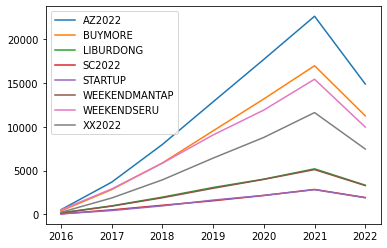

In [ ]:
for code in promo_year.promo_code.unique():
    plt.plot(promo_year[promo_year.promo_code == code].set_index('year', drop=True)['counts'])

plt.legend(promo_year.promo_code.unique())
plt.show()